In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=1)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(506, 13)
(253, 13)
(253, 13)


In [2]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

# khai bao mo hinh de huan luyen tren tap test

regr.fit(X_test, y_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_pred = regr.predict(X_test)

print('Mean squared error = ', mean_squared_error(y_test, y_test_pred))
print('Mean absolute error = ', mean_absolute_error(y_test, y_test_pred))

Mean squared error =  20.51701624263396
Mean absolute error =  3.218929628981756


In [4]:
import pickle
filename = 'linear_saved_X_test.sav'
pickle.dump(regr, open(filename, 'wb'))
pickle.dump

<function _pickle.dump(obj, file, protocol=None, *, fix_imports=True, buffer_callback=None)>

In [5]:
import numpy as np
loaded_model = pickle.load(open(filename, 'rb'))

id_data = 500
sample1= [X[id_data, 0:]]
print(X[id_data, 0:].shape)

print('show gia tri a sample tien hanh thu nghiem:',sample1)
result = loaded_model.predict(sample1)
regr_notrain = loaded_model.predict(sample1)
print ('ket qua du doan/gia tri thuc te tren mo hinh chua train:',result,'/',
	y[id_data], 'loi: '+ str (abs(result[0]-y[id_data])))


(13,)
show gia tri a sample tien hanh thu nghiem: [array([2.2438e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.8500e-01,
       6.0270e+00, 7.9700e+01, 2.4982e+00, 6.0000e+00, 3.9100e+02,
       1.9200e+01, 3.9690e+02, 1.4330e+01])]
ket qua du doan/gia tri thuc te tren mo hinh chua train: [20.40232557] / 16.8 loi: 3.602325566011448


In [6]:
from sklearn import linear_model
regr_trainfull = linear_model.LinearRegression()

regr_trainfull.fit(X, y)

result_full = regr_trainfull.predict(sample1)
print('ket qua du doan/gia tri thuc te tren mo hinh train tren bo full:',result_full,'/',y[id_data],
	'loi: '+ str (abs(result_full[0]-y[id_data])))

ket qua du doan/gia tri thuc te tren mo hinh train tren bo full: [20.46870847] / 16.8 loi: 3.6687084696060204


In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
x_data, y_data = load_digits(return_X_y=True)
print(digits.images.shape)
print(x_data.shape)

(1797, 8, 8)
(1797, 64)


In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import model_from_json

def save_model(model,filename='model-d1'):
    model_json = model.to_json()
    with open(filename+".json", "w") as json_file:
        json_file.write(model_json)
    #    
    model.save_weights(filename+".h5")
    print("Saved model to disk")
#
def load_model(filename='model-d1'):
    model = model_from_json(open(filename+'.json').read())
    model.load_weights(filename+'.h5')
    model.compile(loss='categorical_ crossentropy', optimizer='adam')
    return model
#
def prepare_targets(y_train, y_test="", num_classes=10):
	y_train=to_categorical(y_train, num_classes = num_classes)

	if y_test !="":
		y_test = to_categorical(y_train, num_classes = num_classes)
		return y_train, y_test
	else:
		return y_train

2023-10-19 13:26:47.401624: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-19 13:26:47.834520: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-19 13:26:47.839033: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-19 13:26:50.826435: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
# Dinh nghia kien truc CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
def create_model():

    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(8,8,1)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

X_image = digits.images.reshape(digits.images.shape[0], digits.images.shape[1], 
                                digits.images.shape[1], 1).astype('float32')

model_to_save = create_model()
y_image = prepare_targets(y_data)
print(y_image.shape)
model_to_save.fit(X_image, y_image, batch_size=32, epochs=10, verbose=1)
save_model(model_to_save, filename='mohinh_nhandangso')

(1797, 10)
Epoch 1/10
57/57 [==============================] - 0s 1ms/step - loss: 0.6134 - accuracy: 0.8036
Epoch 2/10
57/57 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.9727
Epoch 3/10
57/57 [==============================] - 0s 1ms/step - loss: 0.0665 - accuracy: 0.9850
Epoch 4/10
57/57 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9944
Epoch 5/10
57/57 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9961
Epoch 6/10
57/57 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9972
Epoch 7/10
57/57 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 0.9989
Epoch 8/10
57/57 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9994
Epoch 9/10
57/57 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.9994
Epoch 10/10
57/57 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000
Saved mo

input_arr7.shape
(8, 8, 1)
input_arr0.shape
(8, 8, 1)
1/1 [==============================] - 0s 71ms/step
Ket qua du doan, cho hinh so 7 [0.0000000e+00 1.6464613e-27 0.0000000e+00 0.0000000e+00 1.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00] , Ket qua du doan, cho hinh so 0: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


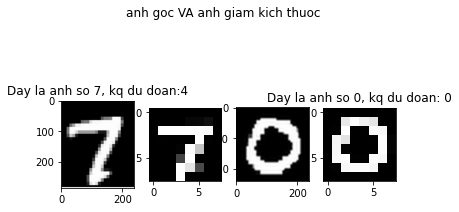

In [17]:
from tensorflow.keras.utils import load_img, img_to_array
# load anh tu may tinh
anh='so07.png'
image_goc7 = load_img(anh)
# giam kich thuoc cho khop voi mo hinh da huan luyen
image7 = load_img(anh, target_size=(8,8), color_mode='grayscale')
anh='so0.png'
image_goc0 = load_img(anh)
image0 = load_img(anh, target_size=(8,8), color_mode='grayscale')

# chuyen doi sang mang de dua vo mo hinh
input_arr7 = img_to_array(image7)
input_arr0 = img_to_array(image0)

# hien thi kich thuoc
print('input_arr7.shape')
print( input_arr7.shape)
print('input_arr0.shape')
print( input_arr0.shape)

# dua vao mang de thuc hien du doan, mang nay gom 2 anh
input_arr2 = np.array([input_arr7,input_arr0])

import matplotlib.pyplot as plt
files_to_load = 'mohinh_nhandangso'
model_image = load_model(files_to_load)

predictions = model_image.predict (input_arr2)
print('Ket qua du doan, cho hinh so 7',
predictions[0],', Ket qua du doan, cho hinh so 0:', predictions[1])

# bieu dien anh va ket qua du doan
fig, axs = plt.subplots(1,4)
fig.suptitle('anh goc VA anh giam kich thuoc')
axs[0].set_title("Day la anh so 7, kq du doan:"+str(predictions[0].argmax(axis=-1)))
axs[0].imshow(image_goc7, cmap='gray')
axs[1].imshow(image7, cmap='gray')

axs[2].imshow(image_goc0, cmap='gray')
axs[3].set_title("Day la anh so 0, kq du doan: "+str(predictions[1].argmax(axis=-1)))
axs[3]. imshow(image0, cmap='gray')